In [1]:
import pandas as pd

# Load the  clean data set 

In [2]:
df = pd.read_csv('../Data/clean_data.csv')

In [3]:
df

,Type,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,2,-1.731878,-0.952389,-0.947360,0.068185,0.282200,-1.695984,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
1,1,-1.731531,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
2,1,-1.731185,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
3,1,-1.730838,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
4,1,-1.730492,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,1.730492,-0.602417,-1.082162,0.363820,-1.052012,-1.476034,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
9996,0,1.730838,-0.552421,-1.082162,0.520005,-0.821283,-1.428902,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
9997,2,1.731185,-0.502425,-0.947360,0.592519,-0.660777,-1.350349,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0
9998,0,1.731531,-0.502425,-0.879959,-0.729472,0.854005,-1.303217,-0.06798,-0.10786,-0.097934,-0.099484,-0.04363,0


# Creating traing data 

In [4]:
X = df.drop(columns = ['Machine failure'], axis = 1)
y = df['Machine failure']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

my target column is very imbalance we use the Smote

In [6]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [7]:
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_resampled.value_counts())

Before SMOTE:
 Machine failure
0    7722
1     278
Name: count, dtype: int64
After SMOTE:
 Machine failure
0    7722
1    7722
Name: count, dtype: int64


# import all models 

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
# Creating all models 
models = {
    'LogisticRegression' : LogisticRegression(class_weight='balanced'),
    'RandomForestClassifier' : RandomForestClassifier(class_weight='balanced'),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'GradientBoostingClassifier' : GradientBoostingClassifier(),
    'DecisionTreeClassifier' : DecisionTreeClassifier()
}

In [18]:
# Creating loop for Train my every model
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'{name} model is accuracy is {acc:.2f}, and f1 is {f1:.2f}')
    scores = cross_val_score(model, X, y, cv=5, scoring='f1')
    print(scores.mean())


LogisticRegression model is accuracy is 1.00, and f1 is 0.98
0.9864654852871663
RandomForestClassifier model is accuracy is 1.00, and f1 is 0.98
0.8683954331110375
KNeighborsClassifier model is accuracy is 0.99, and f1 is 0.83
0.9849392817185432
GradientBoostingClassifier model is accuracy is 1.00, and f1 is 0.98
0.8763575647463375
DecisionTreeClassifier model is accuracy is 0.99, and f1 is 0.89
0.7490704871999837


# Chack my Logistic regression is overfit or not by using this two types of curve

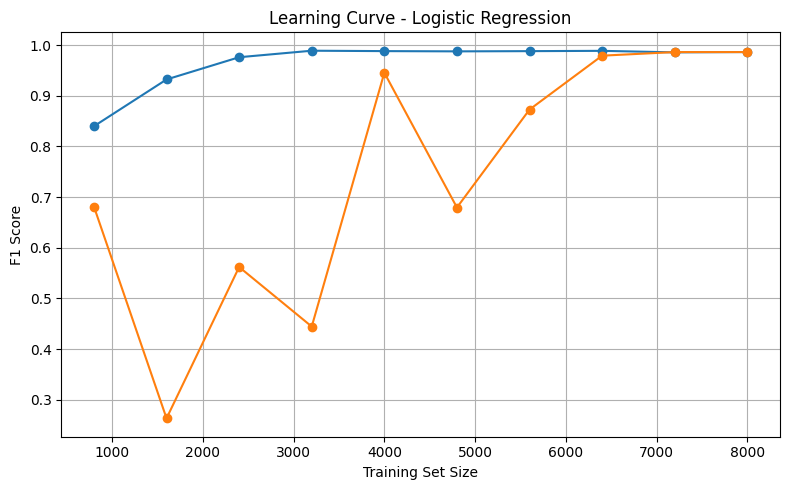

In [23]:
from sklearn.model_selection import learning_curve, validation_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
    plt.title("Learning Curve - Logistic Regression")
    plt.xlabel("Training Set Size")
    plt.ylabel("F1 Score")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_learning_curve(LogisticRegression(class_weight='balanced'), X, y)


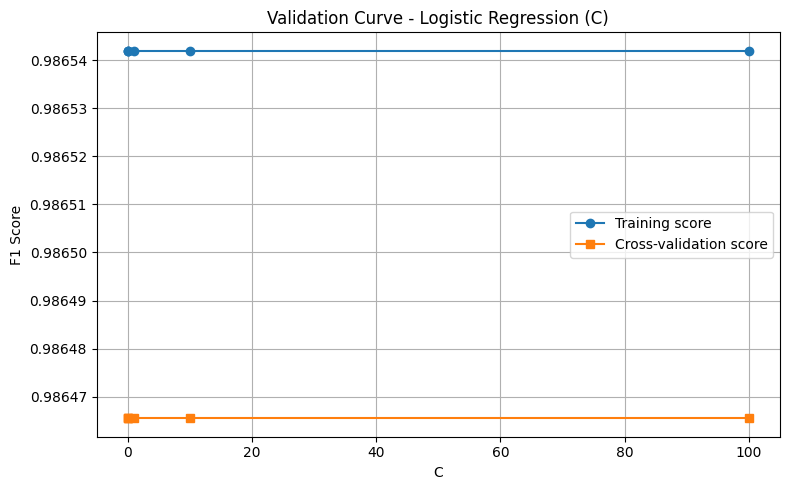

In [24]:
def plot_validation_curve(model, X, y, param_name, param_range):
    train_scores, test_scores = validation_curve(
        model, X, y, param_name=param_name, param_range=param_range,
        cv=5, scoring='f1', n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(param_range, train_mean, label="Training score", marker='o')
    plt.plot(param_range, test_mean, label="Cross-validation score", marker='s')
    plt.title(f"Validation Curve - Logistic Regression ({param_name})")
    plt.xlabel(param_name)
    plt.ylabel("F1 Score")
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call function
param_range = [0.001, 0.01, 0.1, 1, 10, 100]
plot_validation_curve(LogisticRegression(class_weight='balanced', max_iter=1000), X, y, param_name='C', param_range=param_range)


In [26]:
df.columns

Index(['Type', 'UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'Machine failure'],
      dtype='object')

conclusion
1 - logistic Regression model is not  over fit

In [29]:
# Dump the best model
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

df = pd.read_csv("../Data/clean_data.csv") 

target_col =  ['Machine failure'] 
categorical_cols = ['Type']  
numerical_cols = ['UDI', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF',]  

X = df[categorical_cols + numerical_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1), categorical_cols)
])

pipeline = ImbPipeline(steps=[
    ("preprocessing", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("model", LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "model.pkl")
print("Full pipeline saved successfully!")



Full pipeline saved successfully!


c:\Users\Priyanshu pandey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
